# 6002 Project

### Antoniadis Christoforos , Kontoudakis Nikolaos, Tsamoura Evgenia 

In [3]:
# import libraries
import seaborn as sns
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import mplfinance as mpf
import plotly.express as px

from pandas.tseries.offsets import BMonthBegin
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error
from itertools import product
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
from typing import List
from scipy.stats import ttest_ind
from sklearn.metrics import mean_squared_error
%matplotlib inline
sns.set()

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.naive_bayes import BernoulliNB

warnings.filterwarnings('ignore')

In [4]:
# change the following on your pc!
# projectPath = "/home/nikos/Documents/6002_project"
projectPath = "C:/Users/Chris/Downloads"
dataPath = projectPath + "/smp500.csv"

In [5]:
smp500 = pd.read_csv(dataPath, sep= ',', header= 0, names=["date",	"open",	"high",	"low", "close",	"adj. close", "volume"])
smp500 = smp500.drop(columns = ["adj. close"])
smp500['date'] = pd.to_datetime(smp500['date'])

# set date as key
smp500= smp500.set_index(smp500['date']).sort_index().to_period('D').drop(columns = 'date')
smp500

,open,high,low,close,volume
date,,,,,
2022-01-03,4778.14,4796.64,4758.17,4796.56,3831020000
2022-01-04,4804.51,4818.62,4774.27,4793.54,4683170000
2022-01-05,4787.99,4797.70,4699.44,4700.58,4887960000
2022-01-06,4693.39,4725.01,4671.26,4696.05,4295280000
2022-01-07,4697.66,4707.95,4662.74,4677.03,4181510000
...,...,...,...,...,...
2024-11-22,5944.36,5972.90,5944.36,5969.34,4141420000
2024-11-25,5992.28,6020.75,5963.91,5987.37,5633150000
2024-11-26,6000.03,6025.42,5992.27,6021.63,3835170000


### Data validation

In [7]:
print("There are %s na values" %(smp500.isna().sum().sum()))
print("There are %s zero values" % (smp500[smp500 == 0].sum(numeric_only=True).sum()))

# Check inconsistencies
# at every row low must be the lowest value
print("There are %s rows that the low of the row is higher than any other value" % (smp500[(smp500.low> smp500.high) & (smp500.low> smp500.close) & (smp500.low > smp500.open)].sum(numeric_only=True).sum()))

There are 0 na values
There are 0.0 zero values
There are 0.0 rows that the low of the row is higher than any other value


### Outlier Detection

In [9]:
#check the values of each row per specific column for outliers
def identifyOutliers(columnName):
    Zsmp500 = (smp500[columnName] - np.mean(smp500[columnName])) / np.std(smp500[columnName])
    return Zsmp500[(Zsmp500 > 3 ) | (Zsmp500 < -3 )].index
    
# run the function for every column
# smp500= smp500.drop(removeOutliers('open'), axis= 0).drop(removeOutliers('high'), axis= 0).drop(removeOutliers('low'), axis= 0).drop(removeOutliers('close'), axis= 0).drop(removeOutliers('volume'), axis= 0)

print(identifyOutliers('open'))
print(identifyOutliers('high'))
print(identifyOutliers('low'))
print(identifyOutliers('close'))
print(identifyOutliers('volume'))

PeriodIndex([], dtype='period[D]', name='date')
PeriodIndex([], dtype='period[D]', name='date')
PeriodIndex([], dtype='period[D]', name='date')
PeriodIndex([], dtype='period[D]', name='date')
PeriodIndex(['2022-01-24', '2022-02-24', '2022-03-07', '2022-03-08',
             '2022-03-18', '2022-05-31', '2022-06-17', '2022-06-24',
             '2022-09-16', '2022-12-16', '2023-03-17', '2023-06-16',
             '2023-09-15', '2023-12-15', '2024-03-15', '2024-06-21',
             '2024-06-28', '2024-09-20'],
            dtype='period[D]', name='date')


### Ploting

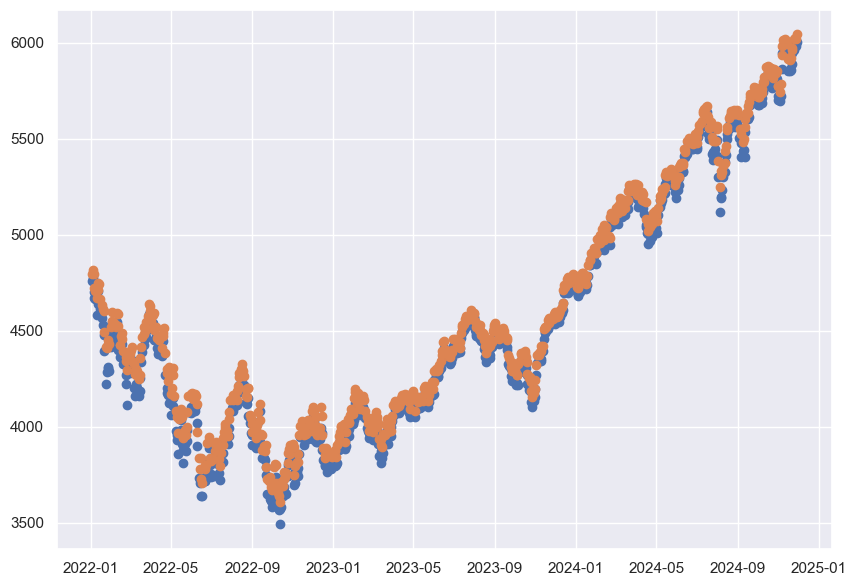

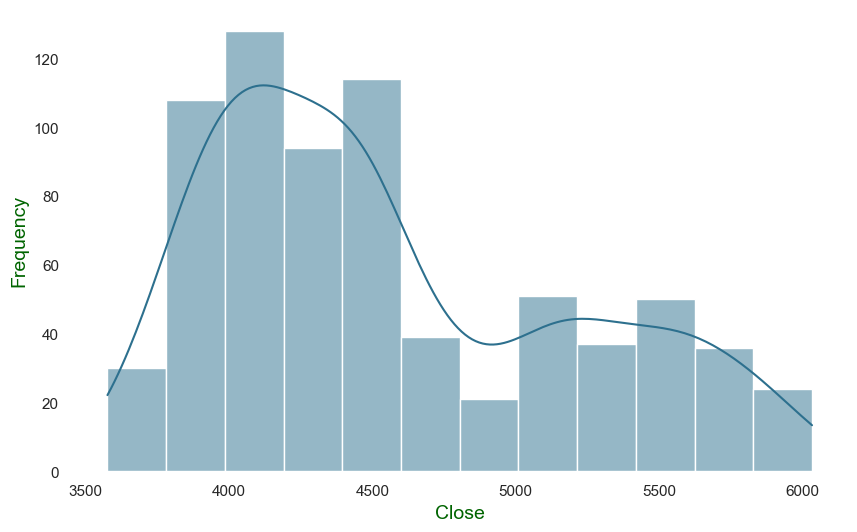

In [11]:
#scater plot
plt.figure(figsize=(10, 7))
plt.scatter(y= smp500.low, x =smp500.index.to_timestamp())
plt.scatter(y= smp500.high, x =smp500.index.to_timestamp())

# histogram
sns.set(style="white")
colors = sns.color_palette("viridis", n_colors=10)

# plotting the SAT score distribution using Seaborn with a KDE (Kernel Density Estimate) plot
plt.figure(figsize=(10, 6))
# sns.histplot(smp500.open, kde=True, color=colors[0])
# sns.histplot(smp500.close, kde=True, color=colors[1])
# sns.histplot(smp500.high, kde=True, color=colors[2])
sns.histplot(smp500.close, kde=True, color=colors[3])
# sns.histplot(smp500.volume, kde=True, color=colors[3])

# Remove left and bottom spines to eliminate the box
sns.despine(left=True, bottom=True)

# set the title and labels
# plt.title("SAT Score Distribution", fontsize=18, color='darkgreen')
plt.xlabel("Close", fontsize=14, color='darkgreen')
plt.ylabel("Frequency", fontsize=14, color='darkgreen')


# display the plot
plt.show()

In [12]:
df = smp500.copy()

In [13]:
# Check numerical columns
num_cols = df.describe(exclude='object') #check numerical columns only
col_names = num_cols.columns # we are using these numerical columns for visualizing our boxplot
# col_names

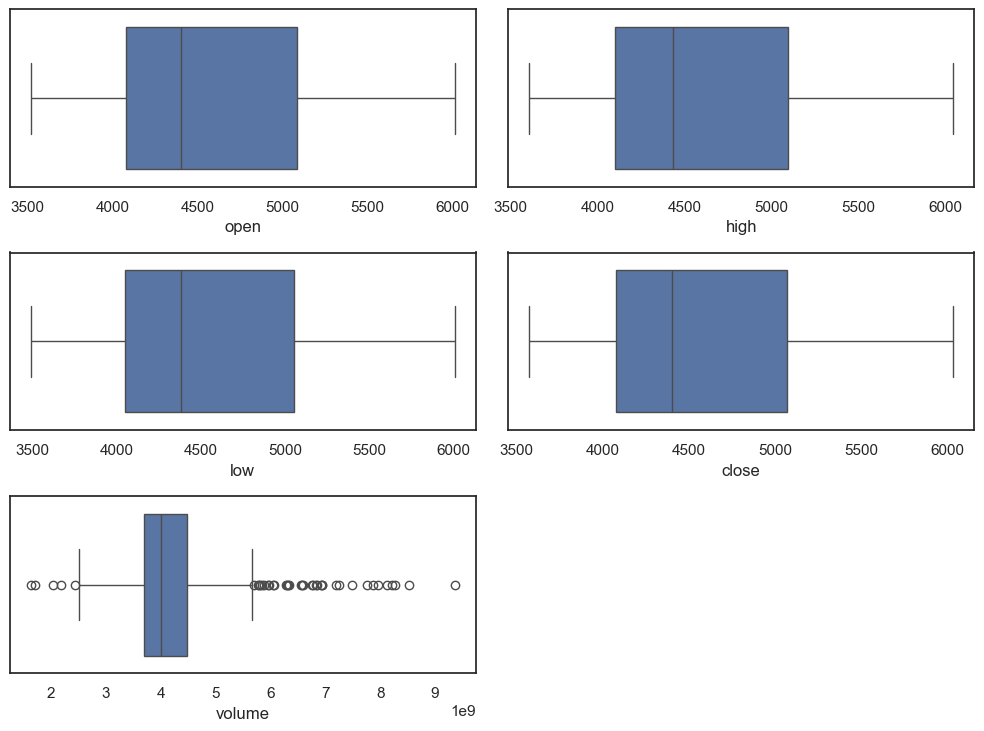

In [14]:
# Boxplot
fig = plt.figure(figsize=(10,7))

for i in range(5): #for 6 columns
    fig.tight_layout()
    grid_col = "32{}".format(i+1)
    ax = fig.add_subplot(int(grid_col))
    sns.boxplot(data=smp500, x=col_names[i], ax=ax)
    
plt.show()

# Q2

In [16]:
compareResults = pd.DataFrame() #save every result metric for comparison
firstPredictionRange = smp500[(smp500.index >= '2022-02-01')&(smp500.index < '2023-01-01')]
first_year = smp500.drop(columns = ['volume'])[(smp500.index >= '2022-01')&(smp500.index < '2023-01')]

firstEleven = first_year[(first_year.index >= '2022-02')]
resultsComparison = pd.DataFrame(first_year['close'])
firstPredictionLength = len(firstPredictionRange)
future_dates = pd.date_range(start='2022-02-01', periods=firstPredictionLength, freq='B')  # Business days
# data = smp500.drop(columns = 'volume')[smp500.index >= '2022-02']

In [17]:
def calculateRMSE(prediction, realData, axis= 0):
    return np.sqrt(((realData - prediction)**2).sum(axis=axis)/len(realData))

In [18]:
def calculateMAD(prediction, realData, axis= 0):
    return np.abs((realData - prediction)).sum(axis=axis)/len(realData)

In [19]:
def calculateTrackingSignal(prediction, realData, MAD):
    forecast_errors = (realData - prediction)
    algebraic_sum_errors = forecast_errors.sum(axis=0)
    tracking_signal = algebraic_sum_errors / MAD
    return tracking_signal

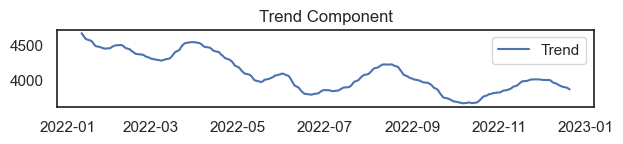

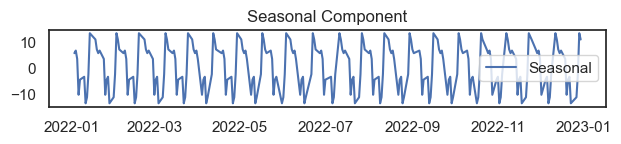

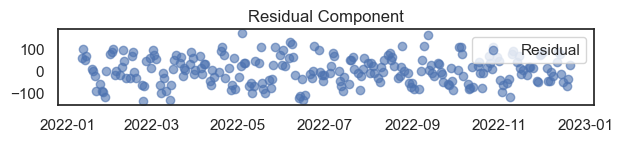

In [20]:
df_dec = seasonal_decompose(first_year['close'].to_timestamp(), model='additive', period=12)

# Trend component
plt.subplot(4, 1, 2)
plt.plot(df_dec.trend, label='Trend')
plt.legend()
plt.title('Trend Component')
plt.tight_layout()
plt.show()

# Seasonal component
plt.subplot(4,1,3)
plt.plot(df_dec.seasonal, label='Seasonal')
plt.legend()
plt.title('Seasonal Component')
plt.tight_layout()
plt.show()

# Residuals
plt.subplot(4, 1, 4)  
plt.scatter(df_dec.resid.index, df_dec.resid, label='Residual', alpha=0.6)
plt.legend()
plt.title('Residual Component')
plt.tight_layout()
plt.show()

### Naive Aproach

In [22]:
# group by month
monthly_summary = smp500.drop(columns = ['volume'])
firstMonth = first_year[(first_year.index >= '2022-01') & (first_year.index < '2022-02')]
naivePrediction = firstMonth[firstMonth['close'] == firstMonth['close'].min()].iloc[0]
# naivePrediction = first_year[(first_year.index == '2022-01-31')].iloc[0]

# repeat the row to match the size of the test data
repeated_naiveResult = pd.DataFrame([naivePrediction] * len(firstEleven), columns=firstEleven.columns, index=firstEleven.index)
resultsComparison['naive']= repeated_naiveResult['close']
naiveMAD = calculateMAD(repeated_naiveResult, firstEleven) 

print(calculateRMSE(repeated_naiveResult, firstEleven), end="\n\n")
print(naiveMAD, end="\n\n")
print(calculateTrackingSignal(repeated_naiveResult, firstEleven, naiveMAD))

open     415.625640
high     425.168423
low      390.284271
close    376.006272
dtype: float64

open     358.239827
high     366.054762
low      337.413203
close    324.514199
dtype: float64

open    -207.576027
high    -212.024424
low     -197.851386
close   -191.587672
dtype: float64


### Rolling window

In [24]:
#We compute a fast moving average of 5 days (MA40) and a slow moving average of 20 days on the close price.
data = firstMonth.copy()

MAS = 10
# MAF = 20 #20 should be the maximum because we have 20 days with data
data['rolling_close_mean'] = data['close'].rolling(window=MAS).mean()
# data['rolling_close_mean_fast'] = data['close'].rolling(window=MAF).mean()

predicted_values = []
last_window = data['close'].iloc[-MAS:].tolist()
# predicted_values_fast = []
# last_window_fast = data['close'].iloc[-MAF:].tolist()

for _ in range(firstPredictionLength):
    # Calculate the mean of the current window
    next_prediction = sum(last_window) / MAS
    predicted_values.append(next_prediction)
    last_window.pop(0)
    last_window.append(next_prediction)
    # next_prediction_fast = sum(last_window_fast) / MAF
    # predicted_values_fast.append(next_prediction_fast)
    
    # last_window_fast.pop(0)
    # last_window_fast.append(next_prediction_fast)

# Create a DataFrame for predictions
predictions = pd.DataFrame({'date': future_dates.to_period('D'), 'close': predicted_values}).set_index('date')
# predictions_fast = pd.DataFrame({'date': future_dates.to_period('D'), 'close': predicted_values_fast}).set_index('date')
resultsComparison['rolling'] = predictions['close']
# resultsComparison['roling_fast'] = predictions_fast['close']

rollingMAD = calculateMAD(predictions['close'], firstEleven['close']) 
print(calculateRMSE(predictions['close'], firstEleven['close']), end="\n")
print(rollingMAD, end= "\n")

print(calculateTrackingSignal(predictions['close'], firstEleven['close'], rollingMAD))

434.1855083597832
367.3604705259549
-215.50690816259768


In [25]:
#We compute a fast moving average of 5 days (MA40) and a slow moving average of 20 days on the close price.
data = firstMonth.copy()

MAS = 15
# MAF = 20 #20 should be the maximum because we have 20 days with data
data['rolling_close_mean'] = data['close'].rolling(window=MAS).mean()
# data['rolling_close_mean_fast'] = data['close'].rolling(window=MAF).mean()

predicted_values = []
last_window = data['close'].iloc[-MAS:].tolist()
# predicted_values_fast = []
# last_window_fast = data['close'].iloc[-MAF:].tolist()

for _ in range(firstPredictionLength):
    # Calculate the mean of the current window
    next_prediction = sum(last_window) / MAS
    predicted_values.append(next_prediction)
    last_window.pop(0)
    last_window.append(next_prediction)
    # next_prediction_fast = sum(last_window_fast) / MAF
    # predicted_values_fast.append(next_prediction_fast)
    
    # last_window_fast.pop(0)
    # last_window_fast.append(next_prediction_fast)

# Create a DataFrame for predictions
predictions = pd.DataFrame({'date': future_dates.to_period('D'), 'close': predicted_values}).set_index('date')
# predictions_fast = pd.DataFrame({'date': future_dates.to_period('D'), 'close': predicted_values_fast}).set_index('date')
# resultsComparison['rolling'] = predictions['close']
# resultsComparison['roling_fast'] = predictions_fast['close']

rollingMAD = calculateMAD(predictions['close'], firstEleven['close']) 
print(calculateRMSE(predictions['close'], firstEleven['close']), end="\n")
print(rollingMAD, end= "\n")

print(calculateTrackingSignal(predictions['close'], firstEleven['close'], rollingMAD))

467.5116745694319
396.66182646288354
-223.31993261572873


In [26]:
#We compute a fast moving average of 5 days (MA40) and a slow moving average of 20 days on the close price.
data = firstMonth.copy()

MAS = 20
# MAF = 20 #20 should be the maximum because we have 20 days with data
data['rolling_close_mean'] = data['close'].rolling(window=MAS).mean()
# data['rolling_close_mean_fast'] = data['close'].rolling(window=MAF).mean()

predicted_values = []
last_window = data['close'].iloc[-MAS:].tolist()
# predicted_values_fast = []
# last_window_fast = data['close'].iloc[-MAF:].tolist()

for _ in range(firstPredictionLength):
    # Calculate the mean of the current window
    next_prediction = sum(last_window) / MAS
    predicted_values.append(next_prediction)
    last_window.pop(0)
    last_window.append(next_prediction)
    # next_prediction_fast = sum(last_window_fast) / MAF
    # predicted_values_fast.append(next_prediction_fast)
    
    # last_window_fast.pop(0)
    # last_window_fast.append(next_prediction_fast)

# Create a DataFrame for predictions
predictions = pd.DataFrame({'date': future_dates.to_period('D'), 'close': predicted_values}).set_index('date')
# predictions_fast = pd.DataFrame({'date': future_dates.to_period('D'), 'close': predicted_values_fast}).set_index('date')
# resultsComparison['rolling'] = predictions['close']
# resultsComparison['roling_fast'] = predictions_fast['close']

rollingMAD = calculateMAD(predictions['close'], firstEleven['close']) 
print(calculateRMSE(predictions['close'], firstEleven['close']), end="\n")
print(rollingMAD, end= "\n")

print(calculateTrackingSignal(predictions['close'], firstEleven['close'], rollingMAD))

500.6715293466751
428.6410910200197
-227.90116160345173


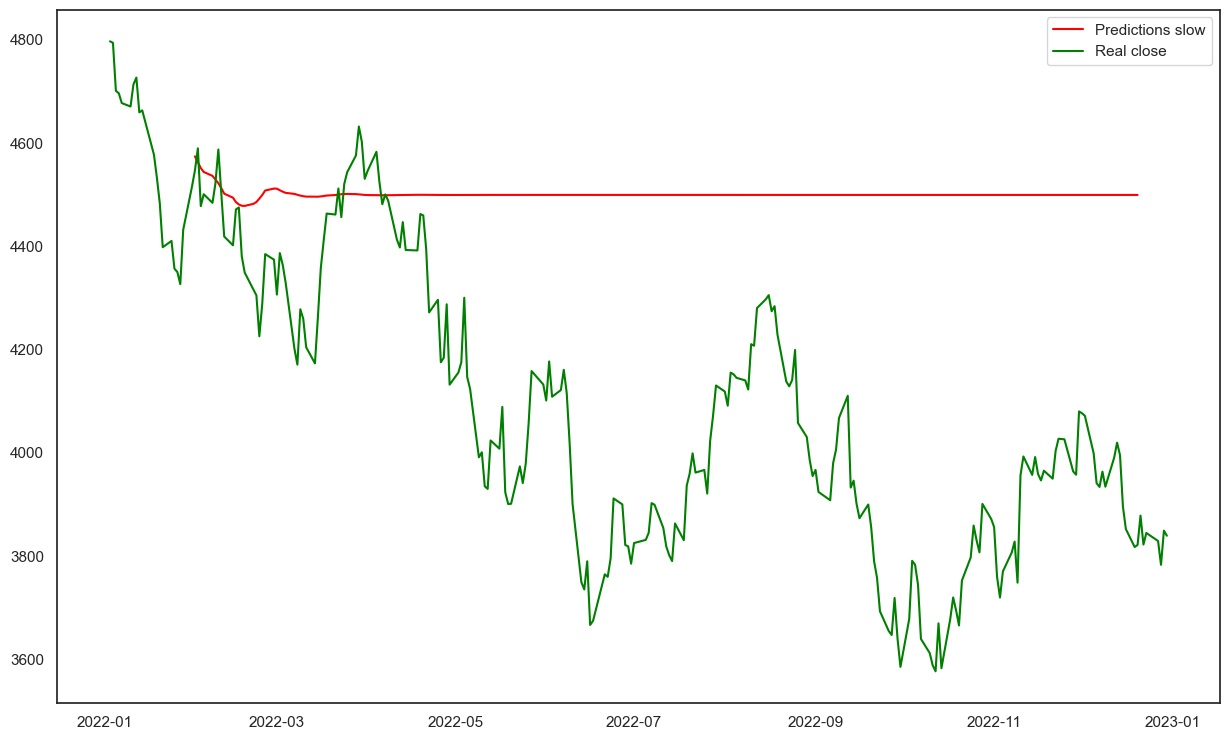

In [27]:
plt.figure(figsize= (15,9))

plt.plot(predictions.index.to_timestamp(), predictions['close'], label='Predictions slow', color='red')
plt.plot(first_year.index.to_timestamp(), first_year['close'], label='Real close', color='green')
plt.legend()
plt.show()

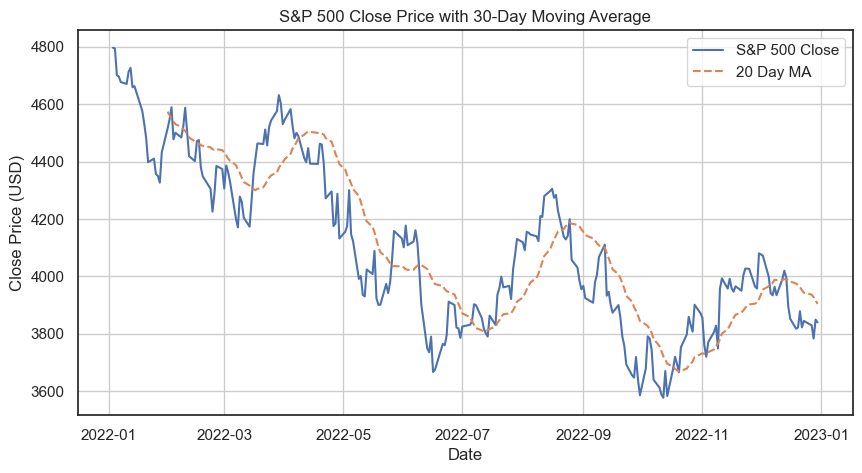

In [28]:
#Source: https://medium.com/@wl8380/how-to-create-a-stock-chart-in-python-a-step-by-step-guide-with-aapl-6d6dd2eceb67
#Calculate the 30-Day Moving Average
df['20_MA']= first_year['close'].rolling(window=20).mean()

#Plot
plt.figure(figsize=(10,5))
plt.plot(first_year['close'].to_timestamp(), label = 'S&P 500 Close')
plt.plot(df['20_MA'], label = '20 Day MA', linestyle= '--')
plt.title('S&P 500 Close Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

### Exponential Smoothing

### 1.0 Simple Exponential Smoothing

In [31]:
# Apply Simple Exponential Smoothing
alpha = 0.1
ses_model = SimpleExpSmoothing(data['close']).fit(smoothing_level=alpha, optimized=False)
sesModelAllYear = SimpleExpSmoothing(first_year['close']).fit(smoothing_level=alpha, optimized=False)

# Forecast for the next 10 periods
forecast = ses_model.forecast(firstPredictionLength)

predictionsSES = pd.DataFrame({'date': future_dates.to_period('D'), 'close': forecast}).set_index('date')

SESMAD = calculateMAD(predictionsSES['close'], firstEleven['close'])
print(calculateRMSE(predictionsSES['close'], firstEleven['close']))
print(SESMAD, end="\n")
print(calculateTrackingSignal(predictionsSES['close'], firstEleven['close'], SESMAD))

531.5125044412061
460.0830407975023
-229.32029123483787


In [32]:
# Apply Simple Exponential Smoothing
alpha = 0.5
ses_model = SimpleExpSmoothing(data['close']).fit(smoothing_level=alpha, optimized=False)
sesModelAllYear = SimpleExpSmoothing(first_year['close']).fit(smoothing_level=alpha, optimized=False)

# Forecast for the next 10 periods
forecast = ses_model.forecast(firstPredictionLength)
predictionsSES = pd.DataFrame({'date': future_dates.to_period('D'), 'close': forecast}).set_index('date')
resultsComparison['SES'] = predictionsSES['close']

SESMAD = calculateMAD(predictionsSES['close'], firstEleven['close'])
print(calculateRMSE(predictionsSES['close'], firstEleven['close']))
print(SESMAD, end="\n")
print(calculateTrackingSignal(predictionsSES['close'], firstEleven['close'], SESMAD))

462.66044391023553
392.7786833065419
-221.80108415852325


In [33]:
# Apply Simple Exponential Smoothing
alpha = 0.9
ses_model = SimpleExpSmoothing(data['close']).fit(smoothing_level=alpha, optimized=False)
sesModelAllYear = SimpleExpSmoothing(first_year['close']).fit(smoothing_level=alpha, optimized=False)

# Forecast for the next 10 periods
forecast = ses_model.forecast(firstPredictionLength)
predictionsSES = pd.DataFrame({'date': future_dates.to_period('D'), 'close': forecast}).set_index('date')

SESMAD = calculateMAD(predictionsSES['close'], firstEleven['close'])
print(calculateRMSE(predictionsSES['close'], firstEleven['close']))
print(SESMAD, end="\n")
print(calculateTrackingSignal(predictionsSES['close'], firstEleven['close'], SESMAD))

506.646458316341
434.7523216704819
-227.65578268465478


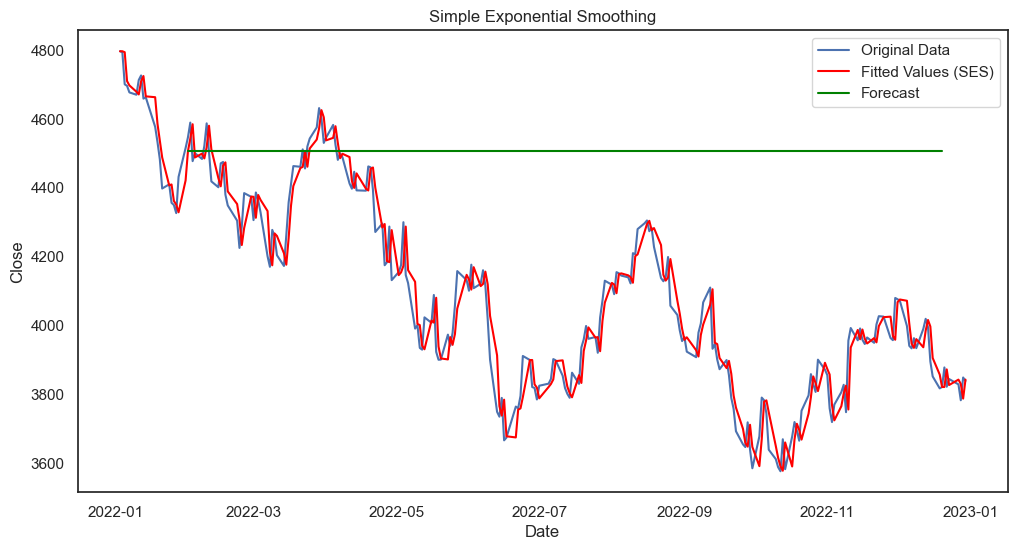

In [34]:
# Plot the original data and the forecast

plt.figure(figsize=(12, 6))
plt.plot(first_year.index.to_timestamp(), first_year['close'], label='Original Data')
plt.plot(sesModelAllYear.fittedvalues, label='Fitted Values (SES)', color='red')
plt.plot(predictionsSES, label='Forecast', color='green')
plt.title('Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

### Double Exponential Smoothing

208.04816543180948
172.83400912792493
135.86077262018526


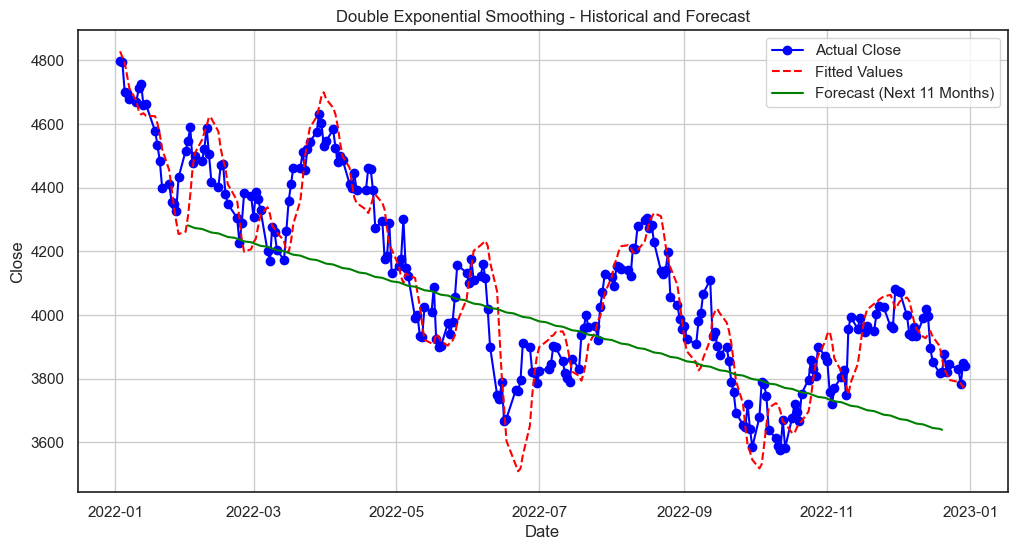

In [36]:
# Fit Double Exponential Smoothing Model
model = sm.tsa.ExponentialSmoothing(data['close'], trend='add')
des_model = model.fit(smoothing_level=0.2, smoothing_slope=0.5)

modelYear = sm.tsa.ExponentialSmoothing(first_year['close'], trend='add')
des_modelYear = modelYear.fit(smoothing_level=0.2, smoothing_slope=0.5)

# Forecast the next 11 months
future_index = pd.date_range(start=pd.Timestamp('2022-02-01'), periods=firstPredictionLength, freq='B').to_period('D')

# Ensure forecast has the same length as future_index
forecast = des_model.forecast(firstPredictionLength)
DES_df = pd.DataFrame({'close': forecast.values}, index=future_index)
resultsComparison['DES'] = DES_df['close']

DESMAD = calculateMAD(DES_df['close'], firstEleven['close'])
print(calculateRMSE(DES_df['close'], firstEleven['close']))
print(DESMAD)
print(calculateTrackingSignal(DES_df['close'], firstEleven['close'], DESMAD))

# Plot Historical and Forecasted Data
plt.figure(figsize=(12, 6))
plt.plot(first_year.index.to_timestamp(), first_year['close'], label='Actual Close', marker='o', color='blue')
plt.plot(des_modelYear.fittedvalues.index, des_modelYear.fittedvalues, label='Fitted Values', color='red', linestyle='--')
plt.plot(DES_df.index, DES_df['close'], label='Forecast (Next 11 Months)', color='green')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Double Exponential Smoothing - Historical and Forecast')
plt.legend()
plt.grid()
plt.show()

### Holt Winter’s Exponential Smoothing (HWES)

In [38]:
data = data.copy()
train = firstMonth
test = firstEleven

def plot_func(forecast1: List[float],
              forecast2: List[float],
              forecast3: List[float],
              title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['close'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['close'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=forecast1, name='Simple'))
    fig.add_trace(go.Scatter(x=test.index, y=forecast2, name="Holt's Linear"))
    fig.add_trace(go.Scatter(x=test.index, y=forecast3, name='Holt Winters'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=700, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Low Volume')
    return fig.show()

In [39]:
train = train.sort_index()
model_simple = SimpleExpSmoothing(train['close']).fit(optimized=True)
forecasts_simple = model_simple.forecast(len(test))

In [40]:
# Fit Holt's model
model_holt = Holt(train['close'], damped_trend=True, initialization_method='estimated').fit(optimized=True)
forecasts_holt = model_holt.forecast(firstPredictionLength)

In [41]:
# Fit Holt-Winters model
model_holt_winters = ExponentialSmoothing(
    train['close'], trend='mul', seasonal='mul', seasonal_periods=10, initialization_method='estimated'
).fit(optimized=True)
forecasts_holt_winters = model_holt_winters.forecast(firstPredictionLength)

forecast_index = pd.date_range(start=train.index[-1].to_timestamp() + pd.Timedelta(days=1), periods=firstPredictionLength, freq='B').to_period('D')
HOLT_df = pd.DataFrame({
    'Holt Forecast': forecasts_holt.values,
    'Holt-Winters Forecast': forecasts_holt_winters.values
}, index=forecast_index)

resultsComparison['Holt'] = HOLT_df['Holt Forecast']
resultsComparison['Holt-winter'] = HOLT_df['Holt-Winters Forecast']

In [42]:
print(model_holt_winters.summary())

holtMAD = calculateMAD(HOLT_df['Holt Forecast'], firstEleven['close'])
holtWinterMAD = calculateMAD(HOLT_df['Holt-Winters Forecast'], firstEleven['close'])

print("Holt Forecast: ")
print(calculateRMSE(HOLT_df['Holt Forecast'], firstEleven['close']))
print(holtMAD)
print(calculateTrackingSignal(HOLT_df['Holt Forecast'], firstEleven['close'], holtMAD), end= "\n\n")

print("Holt-Winters Forecast:")
print(calculateRMSE(HOLT_df['Holt Forecast'], firstEleven['close']))
print(holtWinterMAD)
print(calculateTrackingSignal(HOLT_df['Holt-Winters Forecast'], firstEleven['close'], holtWinterMAD))

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    close   No. Observations:                   20
Model:             ExponentialSmoothing   SSE                          30416.085
Optimized:                         True   AIC                            174.540
Trend:                   Multiplicative   BIC                            188.480
Seasonal:                Multiplicative   AICC                           355.873
Seasonal Periods:                    10   Date:                 Fri, 13 Dec 2024
Box-Cox:                          False   Time:                         11:52:37
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.9950002                alpha                 True
smoothing_trend          

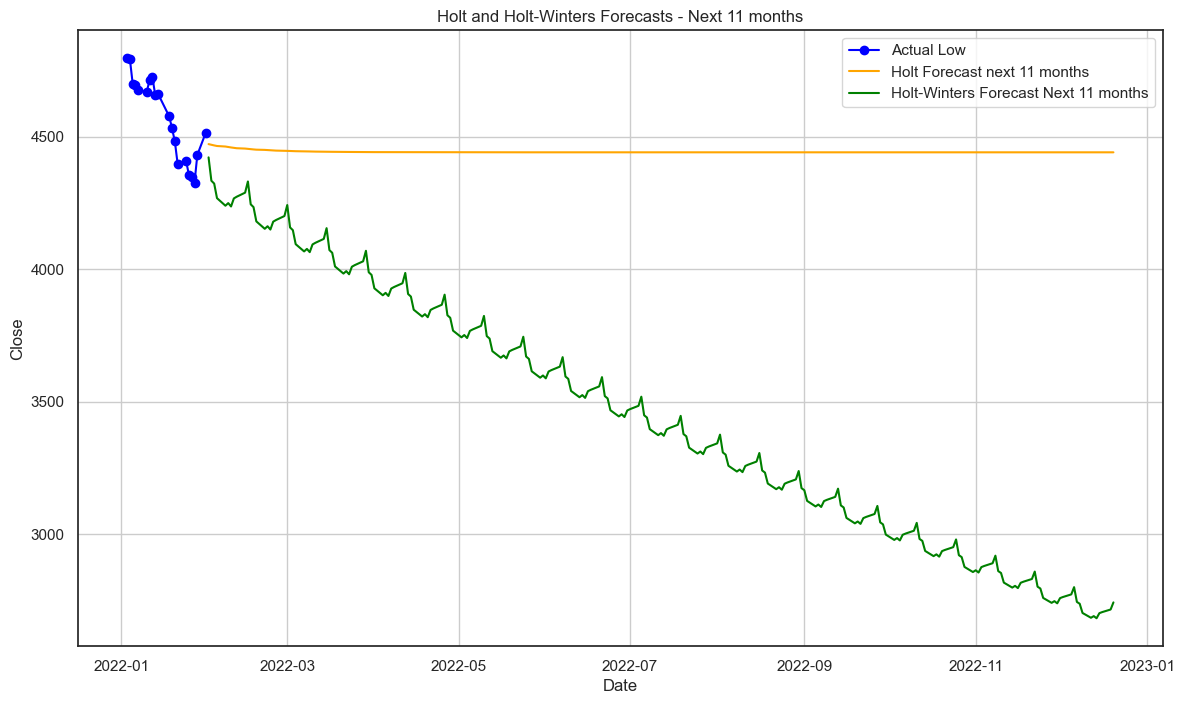

In [43]:
plt.figure(figsize=(14, 8))
plt.plot(train.index.to_timestamp(), train['close'], label='Actual Low', color='blue', marker='o')
plt.plot(HOLT_df.index.to_timestamp(), HOLT_df['Holt Forecast'], label='Holt Forecast next 11 months', color='orange')
plt.plot(HOLT_df.index.to_timestamp(), HOLT_df['Holt-Winters Forecast'], label='Holt-Winters Forecast Next 11 months', color='green')

plt.title('Holt and Holt-Winters Forecasts - Next 11 months')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.grid()
plt.show()

# Q3 

In [45]:
# resultsComparison.to_csv('everyResult.csv')

In [46]:
secondPredictionRange = smp500[(smp500.index >= '2023-02-01')&(smp500.index < '2024-01-01')]
second_year = smp500.drop(columns = ['volume'])[(smp500.index >= '2023-01')&(smp500.index < '2024-01')]

secondEleven = second_year[(second_year.index >= '2023-02')]
resultsComparisonSecond = pd.DataFrame(second_year['close'])
secondPredictionLength = len(secondPredictionRange)
future_dates = pd.date_range(start='2023-02-01', periods=secondPredictionLength, freq='B')  # Business days
# data = smp500.drop(columns = 'volume')[smp500.index >= '2022-02']

### Naive Aproach

In [48]:
# group by month
monthly_summary = smp500.drop(columns = ['volume'])
naivePrediction = second_year[(second_year.index == '2023-01-31')].iloc[0]
firstMonthSecond = second_year[(second_year.index >= '2023-01') & (second_year.index < '2023-02')]

naivePrediction = firstMonth[firstMonth['close'] == firstMonth['close'].max()].iloc[0]


# repeat the row to match the size of the test data
repeated_naiveResult = pd.DataFrame([naivePrediction] * len(secondEleven), columns=secondEleven.columns, index=secondEleven.index)
resultsComparisonSecond['naive']= repeated_naiveResult['close']
naiveMAD = calculateMAD(repeated_naiveResult, secondEleven) 
print(calculateRMSE(repeated_naiveResult, secondEleven), end="\n\n")
print(naiveMAD, end="\n\n")
print(calculateTrackingSignal(repeated_naiveResult, secondEleven, naiveMAD))

open     515.797285
high     511.651449
low      518.042209
close    531.016833
dtype: float64

open     468.549652
high     465.062565
low      469.259348
close    484.737261
dtype: float64

open    -229.944339
high    -230.000000
low     -229.855858
close   -230.000000
dtype: float64


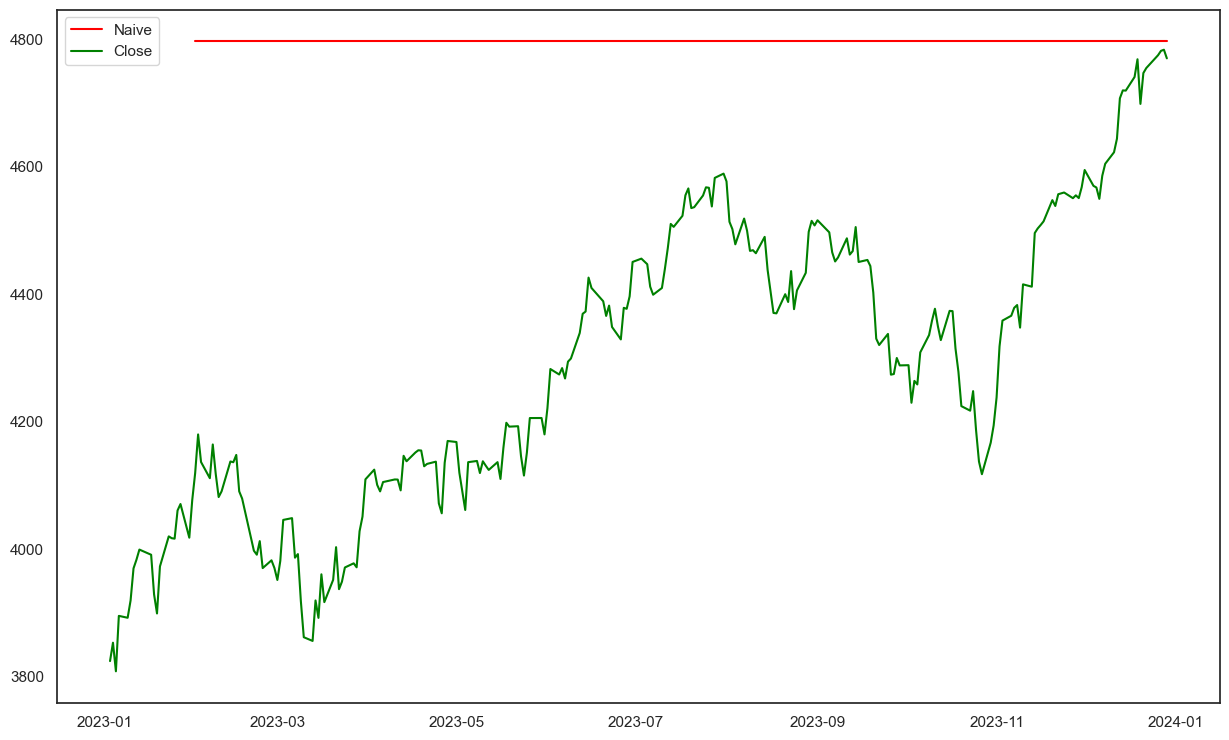

In [49]:
plt.figure(figsize= (15,9))

plt.plot(repeated_naiveResult.index.to_timestamp(), repeated_naiveResult['close'], label='Naive', color= 'red')
plt.plot(second_year.index.to_timestamp(), second_year['close'], label='Close', color='green')
plt.legend()
plt.show()

### Get best window size

In [51]:
data = firstMonthSecond.copy()
results = pd.DataFrame()
genericResults = pd.DataFrame(columns = ['calculateRMSE', 'rollingMAD', 'calculateTrackingSignal'])

for i in range(5, 21):
    MAS = i
    data['rolling_close_mean'] = data['close'].rolling(window=MAS).mean()
    
    predicted_values = []
    last_window = data['close'].iloc[-MAS:].tolist()
    
    for _ in range(secondPredictionLength):
        # Calculate the mean of the current window
        next_prediction = sum(last_window) / MAS
        predicted_values.append(next_prediction)
        last_window.pop(0)
        last_window.append(next_prediction)

    predictions = pd.DataFrame({'date': future_dates.to_period('D'), 'close': predicted_values}).set_index('date')
    rollingMAD = calculateMAD(predictions['close'], secondEleven['close']) 
    
    results = pd.DataFrame(columns = ['calculateRMSE', 'rollingMAD', 'calculateTrackingSignal'])
    genericResults.loc[i] = [calculateRMSE(predictions['close'], secondEleven['close']), rollingMAD, calculateTrackingSignal(predictions['close'], secondEleven['close'], rollingMAD)]

print('best window size is: \n',genericResults.idxmin())
print(genericResults.iloc[0])
print('best window size is: \n',genericResults.idxmax())
print(genericResults.iloc[14])

best window size is: 
 calculateRMSE              5
rollingMAD                 5
calculateTrackingSignal    5
dtype: int64
calculateRMSE              313.976316
rollingMAD                 257.805736
calculateTrackingSignal    211.319542
Name: 5, dtype: float64
best window size is: 
 calculateRMSE              20
rollingMAD                 20
calculateTrackingSignal    20
dtype: int64
calculateRMSE              354.238889
rollingMAD                 296.928146
calculateTrackingSignal    222.243921
Name: 19, dtype: float64


### Rolling window

In [53]:
#We compute a fast moving average of 5 days (MA40) and a slow moving average of 20 days on the close price.
data = firstMonthSecond.copy()

MA = 5
data['rolling_close_mean'] = data['close'].rolling(window=MA).mean()
# data['rolling_close_mean_fast'] = data['close'].rolling(window=MAF).mean()

predicted_values = []
last_window = data['close'].iloc[-MA:].tolist()
# predicted_values_fast = []
# last_window_fast = data['close'].iloc[-MAF:].tolist()

for _ in range(secondPredictionLength):
    # Calculate the mean of the current window
    next_prediction = sum(last_window) / MA
    predicted_values.append(next_prediction)
    last_window.pop(0)
    last_window.append(next_prediction)
    # next_prediction_fast = sum(last_window_fast) / MAF
    # predicted_values_fast.append(next_prediction_fast)
    
    # last_window_fast.pop(0)
    # last_window_fast.append(next_prediction_fast)

# Create a DataFrame for predictions
predictions = pd.DataFrame({'date': future_dates.to_period('D'), 'close': predicted_values}).set_index('date')
# predictions_fast = pd.DataFrame({'date': future_dates.to_period('D'), 'close': predicted_values_fast}).set_index('date')
resultsComparisonSecond['roling'] = predictions['close']
# resultsComparisonSecond['roling_fast'] = predictions_fast['close']

rollingMAD = calculateMAD(predictions['close'], secondEleven['close']) 
print(calculateRMSE(predictions['close'], secondEleven['close']), end="\n")
print(rollingMAD, end= "\n")

print(calculateTrackingSignal(predictions['close'], secondEleven['close'], rollingMAD))

313.97631563562845
257.8057356585499
211.3195415839347


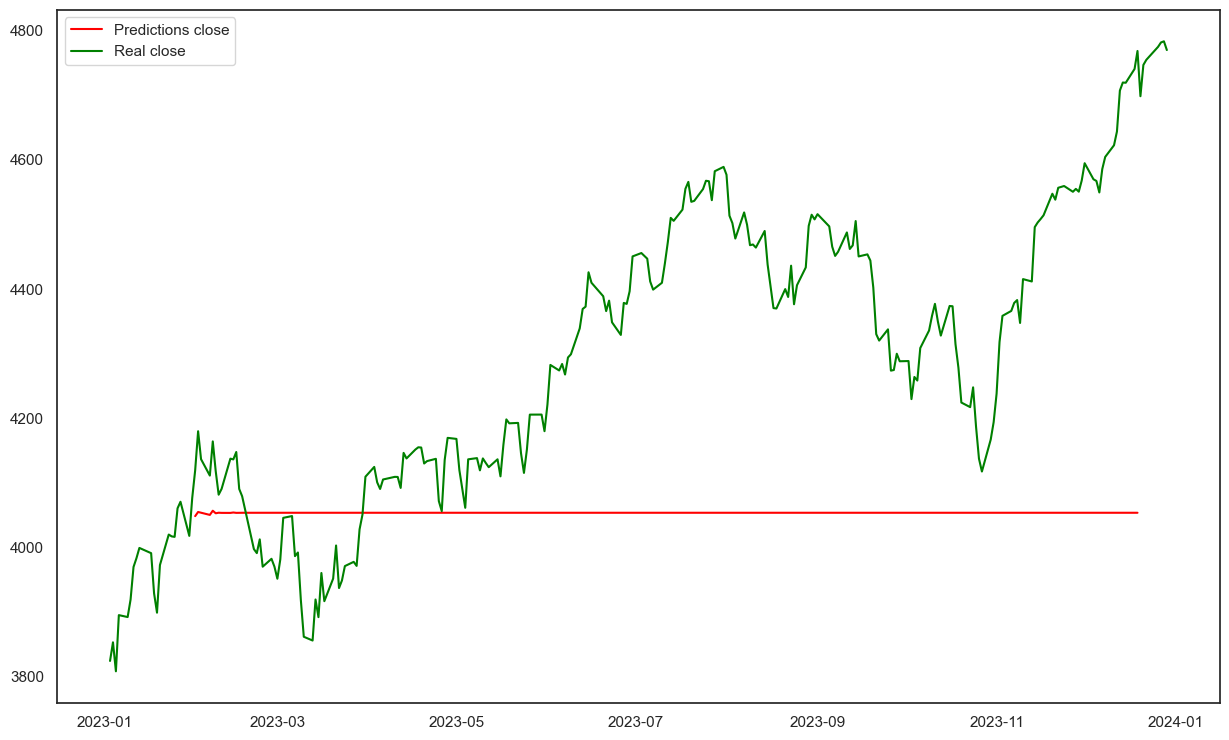

In [54]:
plt.figure(figsize= (15,9))

plt.plot(predictions.index.to_timestamp(), predictions['close'], label='Predictions close', color='red')
plt.plot(second_year.index.to_timestamp(), second_year['close'], label='Real close', color='green')
plt.legend()
plt.show()

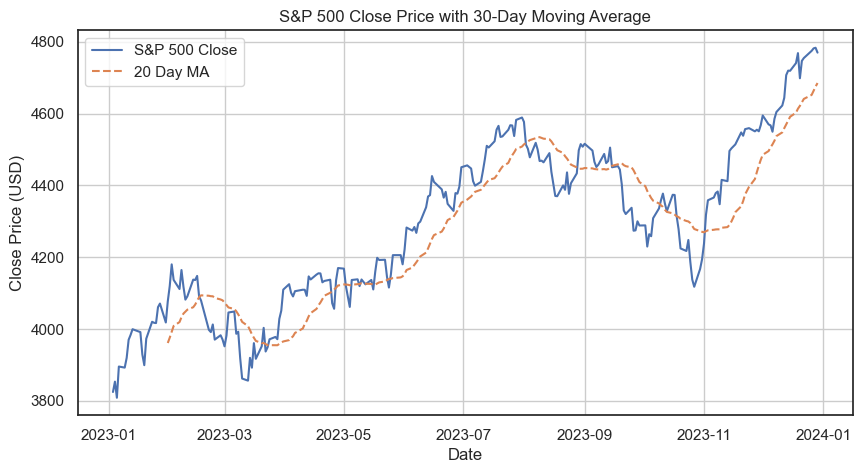

In [55]:
#Source: https://medium.com/@wl8380/how-to-create-a-stock-chart-in-python-a-step-by-step-guide-with-aapl-6d6dd2eceb67
#Calculate the 30-Day Moving Average
df['20_MA']= second_year['close'].rolling(window=20).mean()

#Plot
plt.figure(figsize=(10,5))
plt.plot(second_year['close'].to_timestamp(), label = 'S&P 500 Close')
plt.plot(df['20_MA'], label = '20 Day MA', linestyle= '--')
plt.title('S&P 500 Close Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

### Exponential Smoothing

### 1.0 Simple Exponential Smoothing

In [58]:
genericResultsSES = pd.DataFrame(columns = ['calculateRMSE', 'rollingMAD', 'calculateTrackingSignal'])

for alpha in np.arange(0.01, 1.0, 0.01):
    ses_model = SimpleExpSmoothing(data['close']).fit(smoothing_level=alpha, optimized=False)
    sesModelAllYear = SimpleExpSmoothing(second_year['close']).fit(smoothing_level=alpha, optimized=False)
    forecast = ses_model.forecast(secondPredictionLength)
    predictionsSES = pd.DataFrame({'date': future_dates.to_period('D'), 'close': forecast}).set_index('date')
    resultsComparison['SES'] = predictionsSES['close']
    SESMAD = calculateMAD(predictionsSES['close'], secondEleven['close'])
    results = pd.DataFrame(columns = ['calculateRMSE', 'rollingMAD', 'calculateTrackingSignal'])
    genericResultsSES.loc[alpha] = [calculateRMSE(predictionsSES['close'], secondEleven['close']), SESMAD, calculateTrackingSignal(predictionsSES['close'], secondEleven['close'], SESMAD)]

print(genericResultsSES.min()) 

print(genericResultsSES.idxmin()) 

calculateRMSE              297.347371
rollingMAD                 241.792166
calculateTrackingSignal    204.548422
dtype: float64
calculateRMSE              0.99
rollingMAD                 0.99
calculateTrackingSignal    0.99
dtype: float64


In [59]:
# Apply Simple Exponential Smoothing
alpha = 0.99
ses_model = SimpleExpSmoothing(data['close']).fit(smoothing_level=alpha, optimized=False)
sesModelAllYear = SimpleExpSmoothing(second_year['close']).fit(smoothing_level=alpha, optimized=False)

# Forecast for the next 10 periods
forecast = ses_model.forecast(secondPredictionLength)
predictionsSES = pd.DataFrame({'date': future_dates.to_period('D'), 'close': forecast}).set_index('date')
resultsComparisonSecond['SES'] = predictionsSES['close']

SESMAD = calculateMAD(predictionsSES['close'], secondEleven['close'])
print(calculateRMSE(predictionsSES['close'], secondEleven['close']))
print(SESMAD, end="\n")
print(calculateTrackingSignal(predictionsSES['close'], secondEleven['close'], SESMAD))

297.34737095129026
241.79216557867812
204.54842249414406


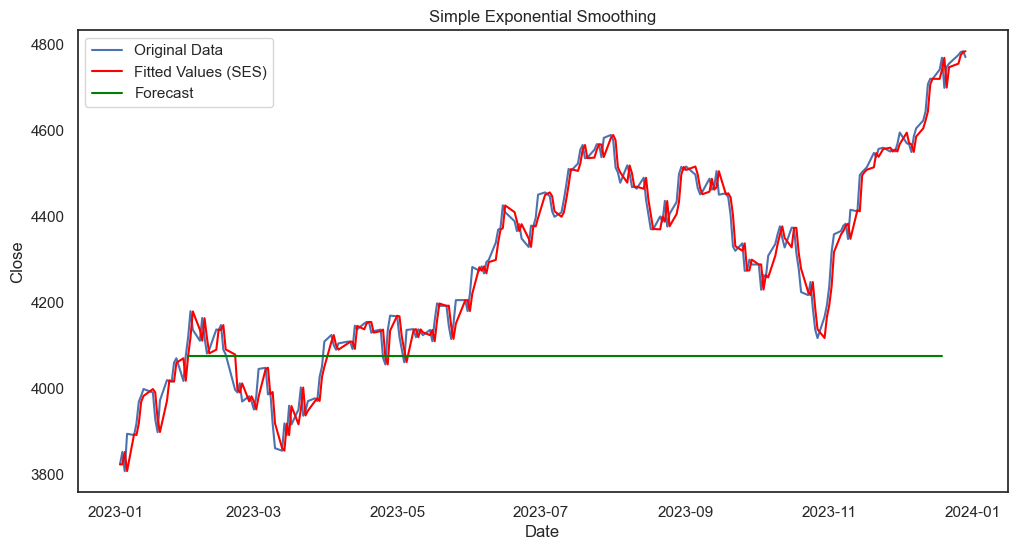

In [60]:
# Plot the original data and the forecast

plt.figure(figsize=(12, 6))
plt.plot(second_year.index.to_timestamp(), second_year['close'], label='Original Data')
plt.plot(sesModelAllYear.fittedvalues, label='Fitted Values (SES)', color='red')
plt.plot(predictionsSES, label='Forecast', color='green')
plt.title('Simple Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()

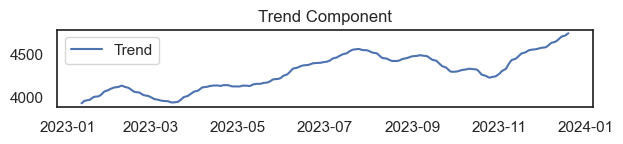

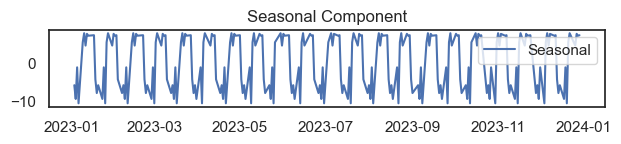

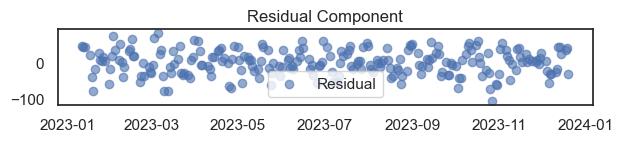

In [61]:
df_dec = seasonal_decompose(second_year['close'].to_timestamp(), model='additive', period=12)

# Trend component
plt.subplot(4, 1, 2)
plt.plot(df_dec.trend, label='Trend')
plt.legend()
plt.title('Trend Component')
plt.tight_layout()
plt.show()

# Seasonal component
plt.subplot(4,1,3)
plt.plot(df_dec.seasonal, label='Seasonal')
plt.legend()
plt.title('Seasonal Component')
plt.tight_layout()
plt.show()

# Residuals
plt.subplot(4, 1, 4)  
plt.scatter(df_dec.resid.index, df_dec.resid, label='Residual', alpha=0.6)
plt.legend()
plt.title('Residual Component')
plt.tight_layout()
plt.show()

### Optimization double exponential smoothing

In [63]:
lowestMAD = 99999999999999999999

model = sm.tsa.ExponentialSmoothing(data['close'], trend='add')
future_index = pd.date_range(start=data.index[0].to_timestamp() + pd.Timedelta(days=1), periods=secondPredictionLength, freq='B').to_period('D')
# for SL in np.arange(0.01, 1.0, 0.01): 
#     for SS in np.arange(0.01, 1.0, 0.01): 
#         des_model = model.fit(smoothing_level= SS, smoothing_slope= SL)
#         forecast = des_model.forecast(secondPredictionLength)
#         DES_df = pd.DataFrame({'close': forecast.values}, index=future_index)
#         DESMAD = calculateMAD(DES_df['close'], secondEleven['close'])
#         trackingSignal = calculateTrackingSignal(DES_df['close'], secondEleven['close'], DESMAD)
#         # print(DES_df['close'].mean())
#         if (DESMAD < lowestMAD):
#             lowestMAD= DESMAD
#             print('Best SS: %s, SL: %s and DESMAD : %s' %(SS, SL, DESMAD))
            

### Double Exponential Smoothing

145.26514264919956
116.97982732503571
90.08109456949376


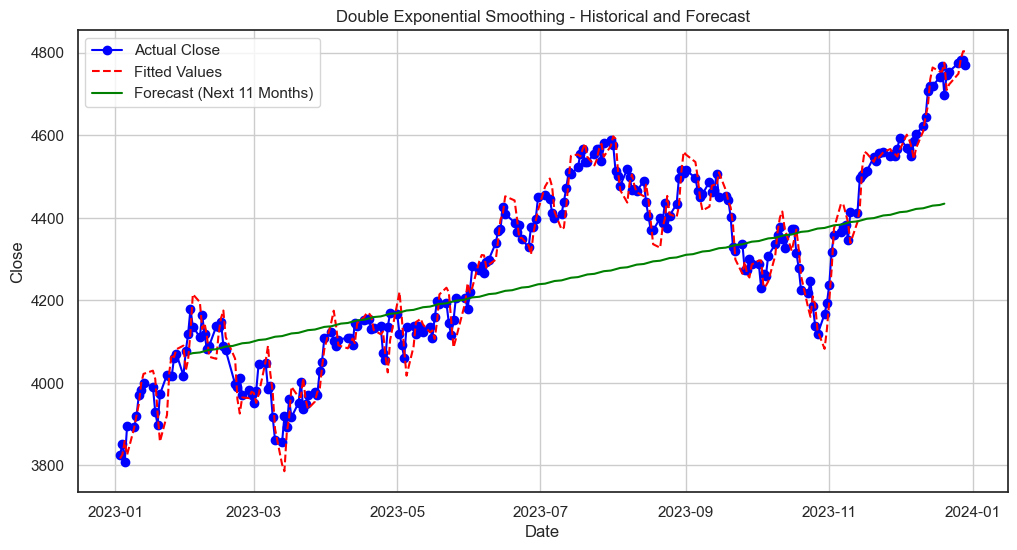

In [65]:
# Fit Double Exponential Smoothing Model
des_model = model.fit(smoothing_level=0.53, smoothing_slope=0.95)

modelYear = sm.tsa.ExponentialSmoothing(second_year['close'], trend='add')
des_modelYear = modelYear.fit(smoothing_level=0.53, smoothing_slope=0.95)

# Forecast the next 11 months
future_index = pd.date_range(start=pd.Timestamp('2023-02-01') + pd.Timedelta(days=1), periods=secondPredictionLength, freq='B').to_period('D')

# Ensure forecast has the same length as future_index
forecast = des_model.forecast(secondPredictionLength)
DES_df = pd.DataFrame({'close': forecast.values}, index=future_index)
resultsComparisonSecond['DES'] = DES_df['close']

DESMAD = calculateMAD(DES_df['close'], secondEleven['close'])
print(calculateRMSE(DES_df['close'], secondEleven['close']))
print(DESMAD)
print(calculateTrackingSignal(DES_df['close'], secondEleven['close'], DESMAD))

# Plot Historical and Forecasted Data
plt.figure(figsize=(12, 6))
plt.plot(second_year.index.to_timestamp(), second_year['close'], label='Actual Close', marker='o', color='blue')
plt.plot(des_modelYear.fittedvalues.index, des_modelYear.fittedvalues, label='Fitted Values', color='red', linestyle='--')
plt.plot(DES_df.index, DES_df['close'], label='Forecast (Next 11 Months)', color='green')
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('Double Exponential Smoothing - Historical and Forecast')
plt.legend()
plt.grid()
plt.show()

### Holt Winter’s Exponential Smoothing (HWES)

In [67]:
data = data.copy()
train = firstMonthSecond
test = secondEleven

def plot_func(forecast1: List[float],
              forecast2: List[float],
              forecast3: List[float],
              title: str) -> None:
    """Function to plot the forecasts."""
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=train.index, y=train['close'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=test['close'], name='Train'))
    fig.add_trace(go.Scatter(x=test.index, y=forecast1, name='Simple'))
    fig.add_trace(go.Scatter(x=test.index, y=forecast2, name="Holt's Linear"))
    fig.add_trace(go.Scatter(x=test.index, y=forecast3, name='Holt Winters'))
    fig.update_layout(template="simple_white", font=dict(size=18), title_text=title,
                      width=700, title_x=0.5, height=400, xaxis_title='Date',
                      yaxis_title='Low Volume')
    return fig.show()

In [68]:
train = train.sort_index()
model_simple = SimpleExpSmoothing(train['close']).fit(optimized=True)
forecasts_simple = model_simple.forecast(len(test))

In [69]:
# Fit Holt's model
model_holt = Holt(train['close'], damped_trend=True, initialization_method='estimated').fit(optimized=True)
forecasts_holt = model_holt.forecast(secondPredictionLength)

In [70]:
# Fit Holt-Winters model
model_holt_winters = ExponentialSmoothing(
    train['close'], trend='mul', seasonal='mul', seasonal_periods=10, initialization_method='estimated'
).fit(optimized=True)
forecasts_holt_winters = model_holt_winters.forecast(secondPredictionLength)

forecast_index = pd.date_range(start=train.index[-1].to_timestamp() + pd.Timedelta(days=1), periods=secondPredictionLength, freq='B').to_period('D')
HOLT_df = pd.DataFrame({
    'Holt Forecast': forecasts_holt.values,
    'Holt-Winters Forecast': forecasts_holt_winters.values
}, index=forecast_index)

resultsComparisonSecond['Holt'] = HOLT_df['Holt Forecast']
resultsComparisonSecond['Holt-winter'] = HOLT_df['Holt-Winters Forecast']

In [71]:
resultsComparison.to_csv('firstYearExport.csv')
resultsComparisonSecond.to_csv('secondYearExport.csv')


In [72]:
print(model_holt_winters.summary())

holtMAD = calculateMAD(HOLT_df['Holt Forecast'], secondEleven['close'])
holtWinterMAD = calculateMAD(HOLT_df['Holt-Winters Forecast'], secondEleven['close'])

print("Holt Forecast: ")
print(calculateRMSE(HOLT_df['Holt Forecast'], secondEleven['close']))
print(holtMAD)
print(calculateTrackingSignal(HOLT_df['Holt Forecast'], secondEleven['close'], holtMAD), end= "\n\n")

print("Holt-Winters Forecast:")
print(calculateRMSE(HOLT_df['Holt Forecast'], secondEleven['close']))
print(holtWinterMAD)
print(calculateTrackingSignal(HOLT_df['Holt-Winters Forecast'], secondEleven['close'], holtWinterMAD))

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    close   No. Observations:                   20
Model:             ExponentialSmoothing   SSE                          15943.388
Optimized:                         True   AIC                            161.621
Trend:                   Multiplicative   BIC                            175.562
Seasonal:                Multiplicative   AICC                           342.955
Seasonal Periods:                    10   Date:                 Fri, 13 Dec 2024
Box-Cox:                          False   Time:                         11:52:40
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.3939286                alpha                 True
smoothing_trend          

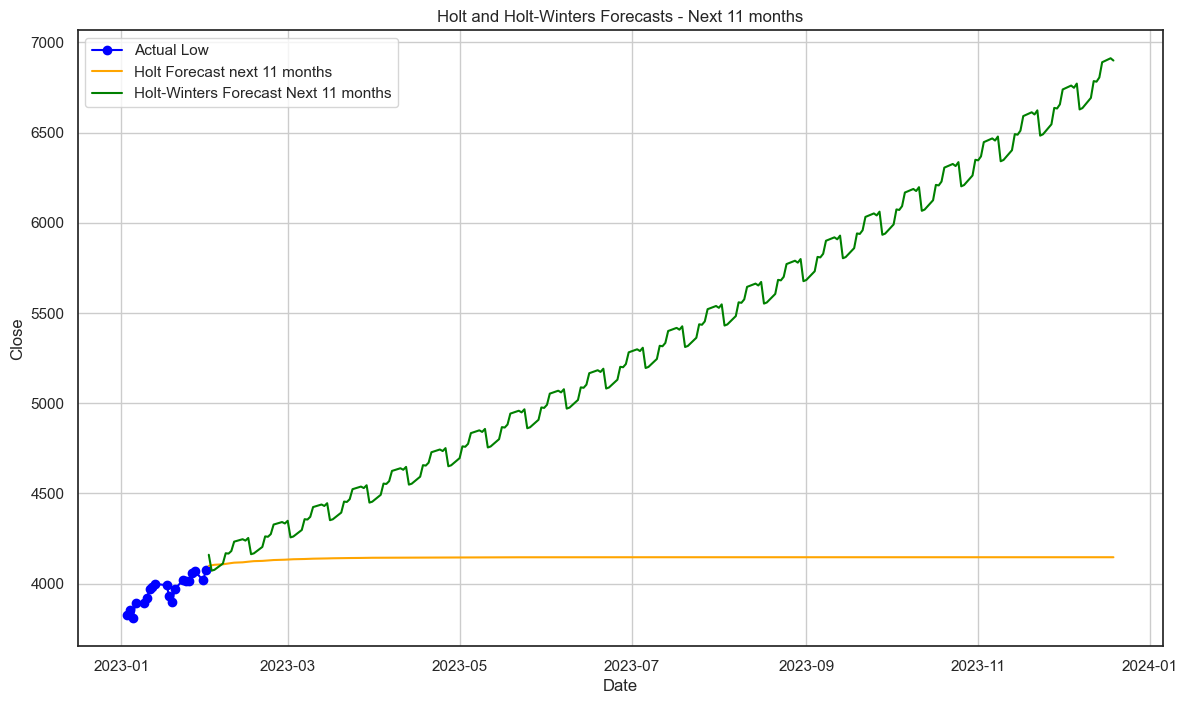

In [73]:
plt.figure(figsize=(14, 8))
plt.plot(train.index.to_timestamp(), train['close'], label='Actual Low', color='blue', marker='o')
plt.plot(HOLT_df.index.to_timestamp(), HOLT_df['Holt Forecast'], label='Holt Forecast next 11 months', color='orange')
plt.plot(HOLT_df.index.to_timestamp(), HOLT_df['Holt-Winters Forecast'], label='Holt-Winters Forecast Next 11 months', color='green')

plt.title('Holt and Holt-Winters Forecasts - Next 11 months')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.grid()
plt.show()

### D Comparison of datasets

In [75]:
# print(resultsComparisonSecond)
# print(resultsComparison)

# ensure that there are only comon columns
commonColumns = resultsComparison.columns.intersection(resultsComparisonSecond.columns)
firstYearAligned = resultsComparison[commonColumns]
secondYearAligned = resultsComparisonSecond[commonColumns]

firstYearStats = secondYearAligned.describe()
secondYearStats = firstYearAligned.describe()
statsDifference = np.abs(secondYearStats - firstYearStats)
print("Difference in Descriptive Statistics:")
print(statsDifference.round(2))

Difference in Descriptive Statistics:
        close   naive    SES     DES    Holt  Holt-winter
count    1.00    1.00  223.0    1.00    1.00         1.00
mean   185.21  470.05    NaN  293.67  300.15      1935.04
std     61.57    0.00    NaN   81.05    3.54       315.83
min    231.07  470.05    NaN  431.03  343.12      1388.29
25%    248.32  470.05    NaN  364.00  296.36      1631.66
50%    263.90  470.05    NaN  298.57  295.30      1920.97
75%    128.08  470.05    NaN  224.38  295.48      2222.19
max     13.21  470.05    NaN  152.97  326.22      2489.87


### E. Monthly Data Set Analysis

In [132]:
# read the csvs
cac_40 = pd.read_csv(projectPath + '/CAC 40.csv')
dax = pd.read_csv(projectPath + '/DAX.csv')
ftse100_ukx = pd.read_csv(projectPath + '/FTSE100 (UKX) .csv')
nasdaq_composite_ixic = pd.read_csv(projectPath + '/NASDAQ Composite (IXIC).csv')
nikkei_225_n225 = pd.read_csv(projectPath + '/Nikkei 225 (N225).csv')
russell_2000_rut = pd.read_csv(projectPath + '/Russell 2000 (RUT).csv')
smi_ssmi = pd.read_csv(projectPath + '/SMI (SSMI).csv')
dja = pd.read_csv(projectPath + '/dja.csv')
s_p_tsx60_sptse = pd.read_csv(projectPath + '/S&P_TSX60 (SPTSE).csv')
stoxx_50_eur_stoxx50er = pd.read_csv(projectPath + '/STOXX 50 EUR (STOXX50ER).csv')

In [134]:
cac_40 = cac_40[['Date', 'Close']]
cac_40['Date'] = pd.to_datetime(cac_40['Date'], dayfirst=True)
cac_40 = cac_40.set_index(cac_40['Date']).sort_index().to_period('D').drop(columns='Date')

dax = dax[['Date', 'Close']]
dax['Date'] = pd.to_datetime(dax['Date'], dayfirst=True)
dax = dax.set_index(dax['Date']).sort_index().to_period('D').drop(columns='Date')

ftse100_ukx = ftse100_ukx[['Date', 'Close']]
ftse100_ukx['Date'] = pd.to_datetime(ftse100_ukx['Date'], dayfirst=True)
ftse100_ukx = ftse100_ukx.set_index(ftse100_ukx['Date']).sort_index().to_period('D').drop(columns='Date')

nasdaq_composite_ixic = nasdaq_composite_ixic[['Date', 'Close']]
nasdaq_composite_ixic['Date'] = pd.to_datetime(nasdaq_composite_ixic['Date'])
nasdaq_composite_ixic = nasdaq_composite_ixic.set_index(nasdaq_composite_ixic['Date']).sort_index().to_period('D').drop(columns='Date')

nikkei_225_n225 = nikkei_225_n225[['Date', 'Close']]
nikkei_225_n225['Date'] = pd.to_datetime(nikkei_225_n225['Date'], dayfirst=True)
nikkei_225_n225 = nikkei_225_n225.set_index(nikkei_225_n225['Date']).sort_index().to_period('D').drop(columns='Date')

russell_2000_rut = russell_2000_rut[['Date', 'Close']]
russell_2000_rut['Date'] = pd.to_datetime(russell_2000_rut['Date'], dayfirst=True)
russell_2000_rut = russell_2000_rut.set_index(russell_2000_rut['Date']).sort_index().to_period('D').drop(columns='Date')

smi_ssmi = smi_ssmi[['Date', 'Close']]
smi_ssmi['Date'] = pd.to_datetime(smi_ssmi['Date'], dayfirst=True)
smi_ssmi = smi_ssmi.set_index(smi_ssmi['Date']).sort_index().to_period('D').drop(columns='Date')

dja = dja[['Date', 'Price']]
dja['Date'] = pd.to_datetime(dja['Date'], dayfirst=True)
dja = dja.set_index(dja['Date']).sort_index().to_period('D').drop(columns='Date')

s_p_tsx60_sptse = s_p_tsx60_sptse[['Date', 'Close']]
s_p_tsx60_sptse['Date'] = pd.to_datetime(s_p_tsx60_sptse['Date'], dayfirst=True)
s_p_tsx60_sptse = s_p_tsx60_sptse.set_index(s_p_tsx60_sptse['Date']).sort_index().to_period('D').drop(columns='Date')

stoxx_50_eur_stoxx50er = stoxx_50_eur_stoxx50er[['Date', 'Close']]
stoxx_50_eur_stoxx50er['Date'] = pd.to_datetime(stoxx_50_eur_stoxx50er['Date'], dayfirst=True)
stoxx_50_eur_stoxx50er = stoxx_50_eur_stoxx50er.set_index(stoxx_50_eur_stoxx50er['Date']).sort_index().to_period('D').drop(columns='Date')

ValueError: time data "11/29/2024" doesn't match format "%d/%m/%Y", at position 9. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [80]:
def first_business_day_each_month(df, year= '2022'):
    try:
        df.index = df.index.to_timestamp()
    except AttributeError:
        print('time index might be allready set')
    # use only dates in 2022
    df_2022 = df.loc[year]
    # B.M.S. : Business Month Start
    return df_2022.resample('BMS').first()  

In [81]:
cac_40_first_days = first_business_day_each_month(cac_40)
dax_first_days = first_business_day_each_month(dax)
ftse100_ukx_first_days = first_business_day_each_month(ftse100_ukx)
nasdaq_composite_ixic_first_days = first_business_day_each_month(nasdaq_composite_ixic)
nikkei_225_n225_first_days = first_business_day_each_month(nikkei_225_n225)
russell_2000_rut_first_days = first_business_day_each_month(russell_2000_rut)
smi_ssmi_first_days = first_business_day_each_month(smi_ssmi)
smp5001_first_days = first_business_day_each_month(smp5001)
s_p_tsx60_sptse_first_days = first_business_day_each_month(s_p_tsx60_sptse)
stoxx_50_eur_stoxx50er_first_days = first_business_day_each_month(stoxx_50_eur_stoxx50er)
smp500_first_days = first_business_day_each_month(smp500)



cac_40_first_days_test = first_business_day_each_month(cac_40, year= '2023')
dax_first_days_test = first_business_day_each_month(dax, year= '2023')
ftse100_ukx_first_days_test = first_business_day_each_month(ftse100_ukx, year= '2023')
nasdaq_composite_ixic_first_days_test = first_business_day_each_month(nasdaq_composite_ixic, year= '2023')
nikkei_225_n225_first_days_test = first_business_day_each_month(nikkei_225_n225, year= '2023')
russell_2000_rut_first_days_test = first_business_day_each_month(russell_2000_rut, year= '2023')
smi_ssmi_first_days_test = first_business_day_each_month(smi_ssmi, year= '2023')
smp5001_first_days_test = first_business_day_each_month(smp5001, year= '2023')
s_p_tsx60_sptse_first_days_test = first_business_day_each_month(s_p_tsx60_sptse, year= '2023')
stoxx_50_eur_stoxx50er_first_days_test = first_business_day_each_month(stoxx_50_eur_stoxx50er, year= '2023')
smp500_first_days_test = first_business_day_each_month(smp500, year= '2023')

time index might be allready set
time index might be allready set
time index might be allready set
time index might be allready set
time index might be allready set
time index might be allready set
time index might be allready set
time index might be allready set
time index might be allready set
time index might be allready set
time index might be allready set


In [82]:
# Combine into a single dataframe
combined_df = pd.concat(
    [
        cac_40_first_days['Close'].rename('cac_40'),
        dax_first_days['Close'].rename('dax'),
        ftse100_ukx_first_days['Close'].rename('ftse100_ukx'),
        nasdaq_composite_ixic_first_days['Close'].rename('nasdaq_composite_ixic'),
        nikkei_225_n225_first_days['Close'].rename('nikkei_225_n225'),
        russell_2000_rut_first_days['Close'].rename('russell_2000_rut'),
        smi_ssmi_first_days['Close'].rename('smi_ssmi'),
        smp5001_first_days['Close'].rename('smp5001'),
        s_p_tsx60_sptse_first_days['Close'].rename('s_p_tsx60_sptse'),
        stoxx_50_eur_stoxx50er_first_days['Close'].rename('stoxx_50_eur_stoxx50er'),
        # lower case c for smp500
        smp500_first_days['close'].rename('smp500')
    ],
    axis=1
)

combined_df_test = pd.concat(
    [
        cac_40_first_days_test['Close'].rename('cac_40'),
        dax_first_days_test['Close'].rename('dax'),
        ftse100_ukx_first_days_test['Close'].rename('ftse100_ukx'),
        nasdaq_composite_ixic_first_days_test['Close'].rename('nasdaq_composite_ixic'),
        nikkei_225_n225_first_days_test['Close'].rename('nikkei_225_n225'),
        russell_2000_rut_first_days_test['Close'].rename('russell_2000_rut'),
        smi_ssmi_first_days_test['Close'].rename('smi_ssmi'),
        smp5001_first_days_test['Close'].rename('smp5001'),
        s_p_tsx60_sptse_first_days_test['Close'].rename('s_p_tsx60_sptse'),
        stoxx_50_eur_stoxx50er_first_days_test['Close'].rename('stoxx_50_eur_stoxx50er'),
        # lower case c for smp500
        smp500_first_days_test['close'].rename('smp500')
    ],
    axis=1
)


# Display the resulting dataframe
print(combined_df)

             cac_40       dax  ftse100_ukx  nasdaq_composite_ixic  \
2022-01-03  7217.22  16020.73      7433.01               15832.80   
2022-02-01  7099.49  15619.39      7466.38               14346.00   
2022-03-01  6396.49  13904.85      7291.27               13532.46   
2022-04-01  6684.31  14446.48      7546.32               14261.50   
2022-05-02  6425.61  13939.07      7597.83               12536.02   
2022-06-01  6418.89  14340.47      7600.62               11994.46   
2022-07-01  5931.06  12813.03      7241.96               11127.84   
2022-08-01  6436.86  13479.63      7498.25               12368.98   
2022-09-01  6034.31  12630.23      7297.26               11785.13   
2022-10-03  5794.15  12209.48      7060.85               10815.43   
2022-11-01  6328.25  13338.74      7350.04               10890.84   
2022-12-01  6753.97  14490.30      7759.82               11482.45   

            nikkei_225_n225  russell_2000_rut  smi_ssmi  smp5001  \
2022-01-03         29301.79       

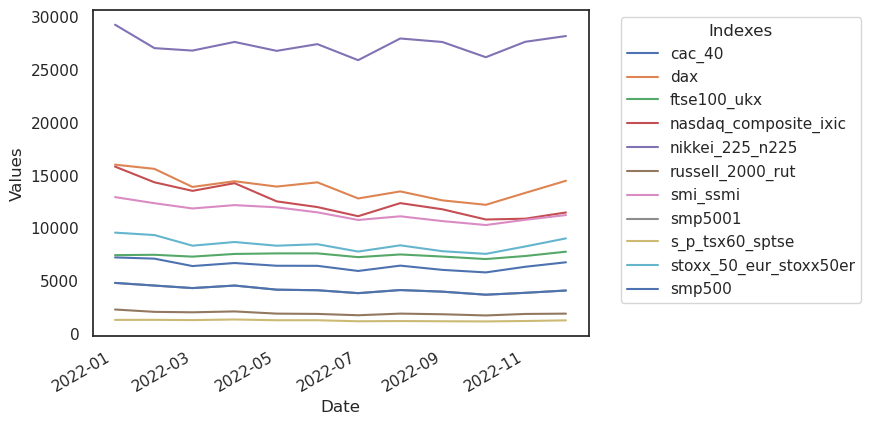

In [83]:
# nasdaq_composite_ixic has too big numbers and ruins the graph
combined_df.plot()

plt.xlabel("Date")
plt.ylabel("Values")
plt.legend(title="Indexes", bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend for columns

plt.show()
# print(combined_df)

In [84]:
def forecast_dataframe(data, smoothing_level=0.53, smoothing_slope=0.95, second_prediction_length=11):
    forecast_results = {}
    
    for column in data.columns:
        # Create the model and fit it for the given column
        model = sm.tsa.ExponentialSmoothing(data[column], trend='add')
        des_model = model.fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope)

        # set month index
        future_index = pd.date_range(
            start= pd.Timestamp('2023-01-02'),
            periods=second_prediction_length, 
            freq='MS'  
        ) + BMonthBegin(1)  

        forecast = des_model.forecast(second_prediction_length)
        
        # Save the forecast 
        forecast_results[column] = forecast.values

    forecast_df = pd.DataFrame(forecast_results, index=future_index)
    return forecast_df

In [85]:
forecast_df = forecast_dataframe(combined_df, second_prediction_length=10)
forecast_df

,cac_40,dax,ftse100_ukx,nasdaq_composite_ixic,nikkei_225_n225,russell_2000_rut,smi_ssmi,smp5001,s_p_tsx60_sptse,stoxx_50_eur_stoxx50er,smp500
2023-03-01,6879.979867,14813.269820,7796.610307,11132.776125,28309.360143,1907.996859,11342.172261,4046.689631,1266.756276,9207.245636,4046.689631
2023-04-03,7287.347312,15892.152395,8101.013157,11213.613296,28860.031340,1963.196745,11781.294115,4175.474494,1321.867381,9866.229676,4175.474494
2023-04-03,7694.714757,16971.034971,8405.416006,11294.450467,29410.702537,2018.396630,12220.415968,4304.259356,1376.978485,10525.213716,4304.259356
2023-06-01,8102.082202,18049.917546,8709.818856,11375.287639,29961.373734,2073.596516,12659.537822,4433.044218,1432.089589,11184.197756,4433.044218
2023-07-03,8509.449647,19128.800122,9014.221705,11456.124810,30512.044931,2128.796402,13098.659676,4561.829080,1487.200693,11843.181796,4561.829080
2023-07-03,8916.817092,20207.682697,9318.624555,11536.961981,31062.716127,2183.996287,13537.781529,4690.613942,1542.311797,12502.165836,4690.613942
2023-09-01,9324.184538,21286.565273,9623.027405,11617.799152,31613.387324,2239.196173,13976.903383,4819.398804,1597.422902,13161.149876,4819.398804
2023-10-02,9731.551983,22365.447848,9927.430254,11698.636323,32164.058521,2294.396059,14416.025237,4948.183666,1652.534006,13820.133916,4948.183666
2023-10-02,10138.919428,23444.330424,10231.833104,11779.473494,32714.729718,2349.595944,14855.147090,5076.968528,1707.645110,14479.117957,5076.968528
2023-12-01,10546.286873,24523.212999,10536.235954,11860.310666,33265.400915,2404.795830,15294.268944,5205.753390,1762.756214,15138.101997,5205.753390


In [86]:
def calculate_af_ratio(forecast_df, test_data):
    
    #ensure same indexing
    aligned_test_data = test_data.reindex(forecast_df.index)
    af_ratios = aligned_test_data / forecast_df
    return af_ratios

In [87]:
af_ratios = calculate_af_ratio(forecast_df, combined_df_test)
af_ratios.mean().mean()

0.8998739720282859

In [88]:
imporovedDES = resultsComparisonSecond['DES']* af_ratios.mean().mean()
imporovedDES

impovedDESMAD = calculateMAD(imporovedDES, second_year['close'], axis= 0)
improvedDESTS = calculateTrackingSignal(imporovedDES, second_year['close'], impovedDESMAD)
improvedsDESRMSE = calculateRMSE(imporovedDES, second_year['close'], axis= 0)

print(improvedsDESRMSE)
print(improvedDESTS)
print(improvedsDESRMSE)

467.15857964759687
250.0
467.15857964759687
